In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from os import chdir

chdir("/home/jaimedgp/Repositories/AirQualityCOVID/")

In [3]:
data = pd.read_csv("data/results.csv")

In [4]:
a = pd.pivot_table(data, 
                   index=["site"], 
                   columns=["date"]
                  )

In [5]:
a.shape

(60, 333)

In [6]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.utils import to_time_series_dataset

/home/jaimedgp/.local/lib/python3.7/site-packages/tslearn/clustering/kmeans.py:17: UserWarning: Scikit-learn <0.24 will be deprecated in a future release of tslearn
  "Scikit-learn <0.24 will be deprecated in a "


In [7]:
seed = 0
np.random.seed(seed)

model = TimeSeriesKMeans(n_clusters=2, 
                         metric="dtw",
                         verbose=False,
                         #max_iter_barycenter=1,
                         #metric_params={"gamma": .01},
                         random_state=seed
                        )

In [ ]:
from tslearn.barycenters import dtw_barycenter_averaging

b = dtw_barycenter_averaging(q)

/home/jaimedgp/.local/lib/python3.7/site-packages/tslearn/barycenters/dba.py:596: RuntimeWarning: invalid value encountered in double_scalars
  if abs(cost_prev - cost) < tol:


In [8]:
q = to_time_series_dataset(a.to_numpy(
                  ).reshape(60, 333, 1))
model.fit_predict(q)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

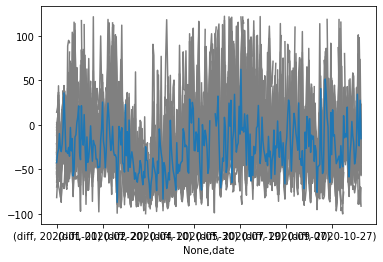

In [9]:
a.T.plot(color="gray", legend=False)
plt.plot(model.cluster_centers_[0], label="0")